In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

In [7]:
path = r'C:\Users\E1180014\Projetos\datasets\database.sqlite'
database = path + '\database.sqlite'

In [8]:
conn = sqlite3.connect(database)
tables = pd.read_sql("""SELECT *
                        FROM sqlite_master
                        WHERE type='table';""", conn)
tables

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,4,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,Player_Attributes,Player_Attributes,11,"CREATE TABLE ""Player_Attributes"" (\n\t`id`\tIN..."
2,table,Player,Player,14,CREATE TABLE `Player` (\n\t`id`\tINTEGER PRIMA...
3,table,Match,Match,18,CREATE TABLE `Match` (\n\t`id`\tINTEGER PRIMAR...
4,table,League,League,24,CREATE TABLE `League` (\n\t`id`\tINTEGER PRIMA...
5,table,Country,Country,26,CREATE TABLE `Country` (\n\t`id`\tINTEGER PRIM...
6,table,Team,Team,29,"CREATE TABLE ""Team"" (\n\t`id`\tINTEGER PRIMARY..."
7,table,Team_Attributes,Team_Attributes,2,CREATE TABLE `Team_Attributes` (\n\t`id`\tINTE...


In [9]:
countries = pd.read_sql("""SELECT *
                            FROM Country;""", conn)
countries

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


In [10]:
leagues = pd.read_sql("""SELECT *
                            FROM League;""", conn)
leagues

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A
5,13274,13274,Netherlands Eredivisie
6,15722,15722,Poland Ekstraklasa
7,17642,17642,Portugal Liga ZON Sagres
8,19694,19694,Scotland Premier League
9,21518,21518,Spain LIGA BBVA


In [12]:
country_leagues = pd.read_sql("""SELECT C.name AS country_name, L.name AS league_name
                                 FROM Country AS C
                                 INNER JOIN League AS L
                                 ON C.id = L.country_id;""", conn)
country_leagues

,country_name,league_name
0,Belgium,Belgium Jupiler League
1,England,England Premier League
2,France,France Ligue 1
3,Germany,Germany 1. Bundesliga
4,Italy,Italy Serie A
5,Netherlands,Netherlands Eredivisie
6,Poland,Poland Ekstraklasa
7,Portugal,Portugal Liga ZON Sagres
8,Scotland,Scotland Premier League
9,Spain,Spain LIGA BBVA


In [16]:
# O LIMIT limita a quantidade de resultados que quero na tabela final
teams = pd.read_sql("""SELECT *
                       FROM Team
                       ORDER BY team_long_name
                       LIMIT 10;""", conn)
teams

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,16848,8350,29,1. FC Kaiserslautern,KAI
1,15624,8722,31,1. FC Köln,FCK
2,16239,8165,171,1. FC Nürnberg,NUR
3,16243,9905,169,1. FSV Mainz 05,MAI
4,11817,8576,614,AC Ajaccio,AJA
5,11074,108893,111989,AC Arles-Avignon,ARL
6,49116,6493,1714,AC Bellinzona,BEL
7,26560,10217,650,ADO Den Haag,HAA
8,9537,8583,57,AJ Auxerre,AUX
9,9547,9829,69,AS Monaco,MON


In [17]:
games = pd.read_sql("""SELECT *
                       FROM Match
                       LIMIT 10;""", conn)
games

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67
5,6,1,1,2008/2009,1,2008-09-24 00:00:00,492478,8203,8342,1,...,1.67,4.35,3.40,1.70,4.50,3.40,1.70,NaN,NaN,NaN
6,7,1,1,2008/2009,1,2008-08-16 00:00:00,492479,9999,8571,2,...,3.60,2.10,3.25,3.00,1.85,3.25,3.75,2.10,3.25,3.10
7,8,1,1,2008/2009,1,2008-08-16 00:00:00,492480,4049,9996,1,...,2.40,2.80,3.25,2.25,2.80,3.20,2.25,2.88,3.25,2.20
8,9,1,1,2008/2009,1,2008-08-16 00:00:00,492481,10001,9986,1,...,3.10,2.25,3.25,2.80,2.20,3.30,2.80,2.25,3.20,2.80
9,10,1,1,2008/2009,10,2008-11-01 00:00:00,492564,8342,8571,4,...,10.00,1.30,4.35,8.50,1.25,5.00,10.00,1.29,4.50,9.00


In [25]:
# Listando os 20 primeiros jogos do Barcelona em casa ou fora, ordenados por data
matches = pd.read_sql("""SELECT M.id,
                                Country.name AS country_name,
                                League. name AS league_name,
                                M.season,
                                M.stage,
                                M.date,
                                HT.team_long_name AS home_team,
                                AT.team_long_name AS away_team,
                                M.home_team_goal,
                                M.away_team_goal
                          FROM Match AS M
                          JOIN Country ON Country.id = M.country_id
                          JOIN League ON League.id = M.league_id
                          LEFT JOIN Team AS HT on HT.team_api_id = M.home_team_api_id
                          LEFT JOIN Team AS AT on AT.team_api_id = M.away_team_api_id
                          WHERE home_team = 'FC Barcelona' OR away_team = 'FC Barcelona'
                          ORDER BY M.date
                          LIMIT 20;""", conn)
matches

,id,country_name,league_name,season,stage,date,home_team,away_team,home_team_goal,away_team_goal
0,21521,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,CD Numancia,FC Barcelona,1,0
1,21630,Spain,Spain LIGA BBVA,2008/2009,2,2008-09-13 00:00:00,FC Barcelona,Racing Santander,1,1
2,21738,Spain,Spain LIGA BBVA,2008/2009,3,2008-09-21 00:00:00,Real Sporting de Gijón,FC Barcelona,1,6
3,21842,Spain,Spain LIGA BBVA,2008/2009,4,2008-09-24 00:00:00,FC Barcelona,Real Betis Balompié,3,2
4,21853,Spain,Spain LIGA BBVA,2008/2009,5,2008-09-27 00:00:00,RCD Espanyol,FC Barcelona,1,2
5,21858,Spain,Spain LIGA BBVA,2008/2009,6,2008-10-04 00:00:00,FC Barcelona,Atlético Madrid,6,1
6,21875,Spain,Spain LIGA BBVA,2008/2009,7,2008-10-19 00:00:00,Athletic Club de Bilbao,FC Barcelona,0,1
7,21884,Spain,Spain LIGA BBVA,2008/2009,8,2008-10-25 00:00:00,FC Barcelona,UD Almería,5,0
8,21889,Spain,Spain LIGA BBVA,2008/2009,9,2008-11-01 00:00:00,Málaga CF,FC Barcelona,1,4
9,21535,Spain,Spain LIGA BBVA,2008/2009,10,2008-11-08 00:00:00,FC Barcelona,Real Valladolid,6,0


In [26]:
leagues_by_season = pd.read_sql("""SELECT M.id,
                                        Country.name AS country_name,
                                        League. name AS league_name,
                                        M.season,
                                        -- aqui estou contando o numero de rodadas
                                        count(distinct stage) AS number_of_stages,
                                        count(distinct HT.team_long_name) AS number_of_teams,
                                        avg(home_team_goal) AS avg_home_team_scors, 
                                        avg(away_team_goal) AS avg_away_team_goals, 
                                        avg(home_team_goal-away_team_goal) AS avg_goal_dif, 
                                        avg(home_team_goal+away_team_goal) AS avg_goals, 
                                        sum(home_team_goal+away_team_goal) AS total_goals
                                  FROM Match AS M
                                  JOIN Country ON Country.id = M.country_id
                                  JOIN League ON League.id = M.league_id
                                  LEFT JOIN Team AS HT on HT.team_api_id = M.home_team_api_id
                                  LEFT JOIN Team AS AT on AT.team_api_id = M.away_team_api_id
                                  WHERE country_name in ('Spain', 'Germany', 'France', 'Italy', 'England')
                                  GROUP BY country_name, league_name, M.season
                                  HAVING number_of_stages > 10
                                  ORDER BY total_goals DESC;""", conn)
leagues_by_season

,id,country_name,league_name,season,number_of_stages,number_of_teams,avg_home_team_scors,avg_away_team_goals,avg_goal_dif,avg_goals,total_goals
0,21518,Spain,Spain LIGA BBVA,2008/2009,38,20,1.660526,1.236842,0.423684,2.897368,1101
1,23038,Spain,Spain LIGA BBVA,2012/2013,38,20,1.686842,1.184211,0.502632,2.871053,1091
2,2869,England,England Premier League,2011/2012,38,20,1.589474,1.215789,0.373684,2.805263,1066
3,2489,England,England Premier League,2010/2011,38,20,1.623684,1.173684,0.450000,2.797368,1063
4,3249,England,England Premier League,2012/2013,38,20,1.557895,1.239474,0.318421,2.797368,1063
5,2109,England,England Premier League,2009/2010,38,20,1.697368,1.073684,0.623684,2.771053,1053
6,3629,England,England Premier League,2013/2014,38,20,1.573684,1.194737,0.378947,2.768421,1052
7,22658,Spain,Spain LIGA BBVA,2011/2012,38,20,1.678947,1.084211,0.594737,2.763158,1050
8,23418,Spain,Spain LIGA BBVA,2013/2014,38,20,1.631579,1.118421,0.513158,2.750000,1045
9,24178,Spain,Spain LIGA BBVA,2015/2016,38,20,1.618421,1.126316,0.492105,2.744737,1043


In [36]:
# Criando um DataFrame com as temporadas e as Ligas
df = pd.DataFrame()
df['season'] = leagues_by_season['season'].unique()
df = pd.concat([df, pd.DataFrame(columns=leagues_by_season['country_name'].unique(), index=df.index)], axis=1)
df

,season,Spain,England,Italy,France,Germany
0,2008/2009,NaN,NaN,NaN,NaN,NaN
1,2012/2013,NaN,NaN,NaN,NaN,NaN
2,2011/2012,NaN,NaN,NaN,NaN,NaN
3,2010/2011,NaN,NaN,NaN,NaN,NaN
4,2009/2010,NaN,NaN,NaN,NaN,NaN
5,2013/2014,NaN,NaN,NaN,NaN,NaN
6,2015/2016,NaN,NaN,NaN,NaN,NaN
7,2014/2015,NaN,NaN,NaN,NaN,NaN


In [38]:
df = df.rename(columns={'season': 'Season'})
df

,Season,Spain,England,Italy,France,Germany
0,2008/2009,NaN,NaN,NaN,NaN,NaN
1,2012/2013,NaN,NaN,NaN,NaN,NaN
2,2011/2012,NaN,NaN,NaN,NaN,NaN
3,2010/2011,NaN,NaN,NaN,NaN,NaN
4,2009/2010,NaN,NaN,NaN,NaN,NaN
5,2013/2014,NaN,NaN,NaN,NaN,NaN
6,2015/2016,NaN,NaN,NaN,NaN,NaN
7,2014/2015,NaN,NaN,NaN,NaN,NaN


In [39]:
# Preenchendo o dataframe com a media de gols por cada temporada
df.loc[:,'Spain'] = list(leagues_by_season.loc[leagues_by_season['country_name']=='Spain','avg_goals'])
df

,Season,Spain,England,Italy,France,Germany
0,2008/2009,2.897368,NaN,NaN,NaN,NaN
1,2012/2013,2.871053,NaN,NaN,NaN,NaN
2,2011/2012,2.763158,NaN,NaN,NaN,NaN
3,2010/2011,2.750000,NaN,NaN,NaN,NaN
4,2009/2010,2.744737,NaN,NaN,NaN,NaN
5,2013/2014,2.742105,NaN,NaN,NaN,NaN
6,2015/2016,2.713158,NaN,NaN,NaN,NaN
7,2014/2015,2.655263,NaN,NaN,NaN,NaN


In [41]:
df.loc[:, 'England'] = list(leagues_by_season.loc[leagues_by_season['country_name']=='England', 'avg_goals'])
df.loc[:, 'Italy'] = list(leagues_by_season.loc[leagues_by_season['country_name']=='Italy', 'avg_goals'])
df.loc[:, 'France'] = list(leagues_by_season.loc[leagues_by_season['country_name']=='France', 'avg_goals'])
df.loc[:, 'Germany'] = list(leagues_by_season.loc[leagues_by_season['country_name']=='Germany', 'avg_goals'])
df

,Season,Spain,England,Italy,France,Germany
0,2008/2009,2.897368,2.805263,2.723684,2.544737,3.160131
1,2012/2013,2.871053,2.797368,2.686016,2.526316,2.934641
2,2011/2012,2.763158,2.797368,2.639474,2.515789,2.921569
3,2010/2011,2.750000,2.771053,2.610526,2.492105,2.921569
4,2009/2010,2.744737,2.768421,2.600000,2.455263,2.859477
5,2013/2014,2.742105,2.700000,2.576316,2.410526,2.830065
6,2015/2016,2.713158,2.565789,2.513158,2.342105,2.830065
7,2014/2015,2.655263,2.478947,2.583799,2.257895,2.754902


<AxesSubplot:xlabel='Season'>

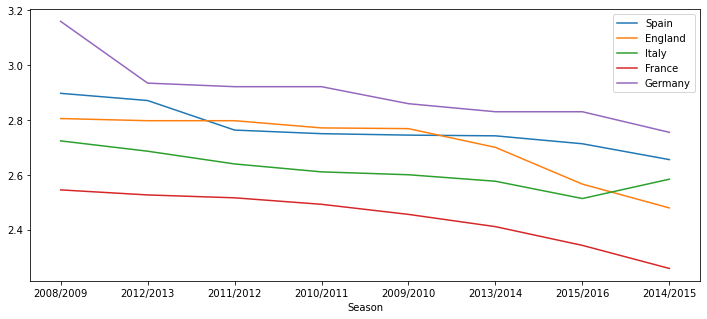

In [45]:
df.plot(x='Season', figsize=(12,5))